In [2]:
import pandas as pd
import numpy as np
import pickle

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
input_file_name = '../data/processed/X_arr_train.pickle'
with open(input_file_name, 'rb') as in_file:
    X_train = pickle.load(in_file)

input_file_name = '../data/processed/X_arr_test.pickle'
with open(input_file_name, 'rb') as in_file:
    X_test = pickle.load(in_file)

input_file_name = '../data/processed/y_arr_train.pickle'
with open(input_file_name, 'rb') as in_file:
    y_train = pd.DataFrame(pickle.load(in_file))

input_file_name = '../data/processed/y_arr_test.pickle'
with open(input_file_name, 'rb') as in_file:
    y_test = pd.DataFrame(pickle.load(in_file))

In [4]:
bins = [-np.inf, -240.0, -180.0, -120.0, -90.0, -60.0, -45.0, -30.0, -15.0, 0, 15.0, 30.0, 45.0, 60.0, 90.0, 120.0,
        180.0, 360.0, 720.0, 1140.0, 2280.0, np.inf]
labels = np.arange(len(bins) - 1)

y_train = pd.cut(y_train['ActArrDelay'].astype('float32'), bins = bins, labels = labels)
y_test = pd.cut(y_test['ActArrDelay'].astype('float32'), bins = bins, labels = labels)

In [5]:
y_train.head(10)

21301968     7
1847783      8
4503524      7
29434102     7
5109312     13
13241369     7
2956146      8
10863237     7
8858142      7
28811163     8
Name: ActArrDelay, dtype: category
Categories (21, int64): [0 < 1 < 2 < 3 ... 17 < 18 < 19 < 20]

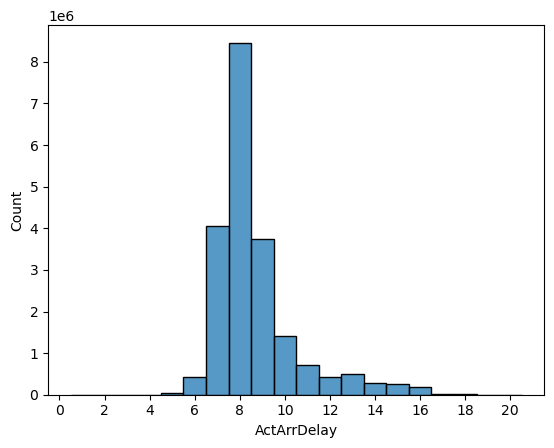

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = y_train, bins=len(labels))
plt.xticks(labels[[x for x in range(len(labels)) if x % 2 == 0]]);

In [7]:
ind = X_train.sample(n= 100_000).index
filter_train = X_train.index.isin(ind)
X_train_small = X_train.iloc[filter_train]
y_train_small = y_train.iloc[filter_train]


In [8]:
ind = X_test.sample(n= 1000).index
filter_test = X_test.index.isin(ind)
X_test_small = X_test.iloc[filter_test]
y_test_small = y_test.iloc[filter_test]

In [9]:
print('Small training X shape:', X_train_small.shape)
print('Small training y shape:', y_train_small.shape)

Small training X shape: (100000, 330)
Small training y shape: (100000,)


In [10]:
pd.DataFrame([labels, bins])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,NaN
1,-inf,-240.0,-180.0,-120.0,-90.0,-60.0,-45.0,-30.0,-15.0,0,...,45.0,60.0,90.0,120.0,180.0,360.0,720.0,1140.0,2280.0,inf


In [58]:
param_distr = {'n_neighbors': list(map(int, np.linspace(10, 1000, 100)))}
knc_model = KNeighborsClassifier()
rnd_cv = RandomizedSearchCV(estimator= knc_model, param_distributions= param_distr, n_iter=20, n_jobs=6, verbose=10, random_state=1812)
rnd_cv.fit(X_train_small, y_train_small)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/envs/springboard/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5; 1/20] START n_neighbors=900............................................
[CV 2/5; 1/20] START n_neighbors=900............................................
[CV 3/5; 1/20] START n_neighbors=900............................................
[CV 4/5; 1/20] START n_neighbors=900............................................
[CV 5/5; 1/20] START n_neighbors=900............................................
[CV 1/5; 2/20] START n_neighbors=100............................................
[CV 1/5; 2/20] END .............n_neighbors=100;, score=0.406 total time= 4.7min
[CV 2/5; 2/20] START n_neighbors=100............................................
[CV 2/5; 1/20] END .............n_neighbors=900;, score=0.408 total time= 4.7min
[CV 3/5; 2/20] START n_neighbors=100............................................
[CV 1/5; 1/20] END .............n_neighbors=900;, score=0.408 total time= 5.0min
[CV 4/5; 2/20] START n_neighbors=100............................................
[CV 4/5; 1/20] END .........

KeyboardInterrupt: 

In [55]:
rnd_cv.best_score_

0.4122

In [56]:
rnd_cv.best_params_

{'n_neighbors': 900}

In [59]:
X_train_small

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,...,ArrTimeBlk_1400-1459,ArrTimeBlk_1500-1559,ArrTimeBlk_1600-1659,ArrTimeBlk_1700-1759,ArrTimeBlk_1800-1859,ArrTimeBlk_1900-1959,ArrTimeBlk_2000-2059,ArrTimeBlk_2100-2159,ArrTimeBlk_2200-2259,ArrTimeBlk_2300-2359
18850366,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17994212,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
23610675,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15509071,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1787305,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497238,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
24476628,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9190561,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
14632891,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
param_distr_forest = {'n_estimators': [100, 200, 300, 400, 500],
                      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                      'criterion': ['gini', 'entropy', 'log_loss']}

rfc_model = RandomForestClassifier()
rnd_cv = RandomizedSearchCV(estimator= rfc_model, param_distributions= param_distr_forest, n_iter = 60, verbose = 10,
                            n_jobs=-1, random_state = 1812)
rnd_cv.fit(X_train_small, y_train_small)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 2/60] START criterion=gini, max_depth=20, n_estimators=500.............
[CV 4/5; 1/60] START criterion=entropy, max_depth=60, n_estimators=100..........
[CV 2/5; 1/60] START criterion=entropy, max_depth=60, n_estimators=100..........
[CV 3/5; 1/60] START criterion=entropy, max_depth=60, n_estimators=100..........
[CV 1/5; 1/60] START criterion=entropy, max_depth=60, n_estimators=100..........
[CV 2/5; 2/60] START criterion=gini, max_depth=20, n_estimators=500.............
[CV 5/5; 1/60] START criterion=entropy, max_depth=60, n_estimators=100..........
[CV 3/5; 2/60] START criterion=gini, max_depth=20, n_estimators=500.............
[CV 3/5; 1/60] END criterion=entropy, max_depth=60, n_estimators=100;, score=0.377 total time= 1.1min
[CV 5/5; 1/60] END criterion=entropy, max_depth=60, n_estimators=100;, score=0.374 total time= 1.1min
[CV 4/5; 2/60] START criterion=gini, max_depth=20, n_estimators=500.............
[CV 4

/opt/anaconda3/envs/springboard/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
python(53515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 6/60] START criterion=entropy, max_depth=70, n_estimators=300..........
[CV 5/5; 4/60] END criterion=gini, max_depth=100, n_estimators=200;, score=0.373 total time= 2.4min
[CV 4/5; 6/60] START criterion=entropy, max_depth=70, n_estimators=300..........
[CV 3/5; 5/60] END criterion=log_loss, max_depth=20, n_estimators=500;, score=0.410 total time= 1.9min
[CV 4/5; 5/60] END criterion=log_loss, max_depth=20, n_estimators=500;, score=0.410 total time= 1.9min
[CV 5/5; 6/60] START criterion=entropy, max_depth=70, n_estimators=300..........
[CV 1/5; 7/60] START criterion=gini, max_depth=90, n_estimators=100.............
[CV 2/5; 5/60] END criterion=log_loss, max_depth=20, n_estimators=500;, score=0.410 total time= 1.9min
[CV 2/5; 7/60] START criterion=gini, max_depth=90, n_estimators=100.............
[CV 5/5; 5/60] END criterion=log_loss, max_depth=20, n_estimators=500;, score=0.409 total time= 1.8min
[CV 3/5; 7/60] START criterion=gini, max_depth=90, n_estimators=100.............
[C

python(53751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5; 10/60] START criterion=log_loss, max_depth=60, n_estimators=100........
[CV 4/5; 6/60] END criterion=entropy, max_depth=70, n_estimators=300;, score=0.375 total time= 3.4min
[CV 2/5; 10/60] START criterion=log_loss, max_depth=60, n_estimators=100........
[CV 5/5; 6/60] END criterion=entropy, max_depth=70, n_estimators=300;, score=0.374 total time= 3.4min
[CV 3/5; 10/60] START criterion=log_loss, max_depth=60, n_estimators=100........
[CV 1/5; 10/60] END criterion=log_loss, max_depth=60, n_estimators=100;, score=0.378 total time= 1.0min
[CV 4/5; 10/60] START criterion=log_loss, max_depth=60, n_estimators=100........
[CV 2/5; 10/60] END criterion=log_loss, max_depth=60, n_estimators=100;, score=0.378 total time=  59.8s
[CV 5/5; 10/60] START criterion=log_loss, max_depth=60, n_estimators=100........
[CV 3/5; 10/60] END criterion=log_loss, max_depth=60, n_estimators=100;, score=0.377 total time= 1.0min
[CV 1/5; 11/60] START criterion=gini, max_depth=20, n_estimators=400...........

python(54141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 13/60] START criterion=entropy, max_depth=70, n_estimators=400.........
[CV 5/5; 11/60] END criterion=gini, max_depth=20, n_estimators=400;, score=0.410 total time= 1.3min
[CV 3/5; 13/60] START criterion=entropy, max_depth=70, n_estimators=400.........
[CV 1/5; 12/60] END criterion=log_loss, max_depth=40, n_estimators=500;, score=0.399 total time= 4.2min
[CV 4/5; 13/60] START criterion=entropy, max_depth=70, n_estimators=400.........
[CV 2/5; 12/60] END criterion=log_loss, max_depth=40, n_estimators=500;, score=0.396 total time= 4.2min
[CV 5/5; 13/60] START criterion=entropy, max_depth=70, n_estimators=400.........
[CV 3/5; 12/60] END criterion=log_loss, max_depth=40, n_estimators=500;, score=0.398 total time= 4.2min
[CV 1/5; 14/60] START criterion=gini, max_depth=100, n_estimators=400...........
[CV 4/5; 12/60] END criterion=log_loss, max_depth=40, n_estimators=500;, score=0.396 total time= 4.2min
[CV 5/5; 12/60] END criterion=log_loss, max_depth=40, n_estimators=500;, score=

python(54604) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 15/60] START criterion=entropy, max_depth=30, n_estimators=400.........
[CV 4/5; 13/60] END criterion=entropy, max_depth=70, n_estimators=400;, score=0.376 total time= 4.8min
[CV 5/5; 13/60] END criterion=entropy, max_depth=70, n_estimators=400;, score=0.374 total time= 4.8min
[CV 3/5; 15/60] START criterion=entropy, max_depth=30, n_estimators=400.........
[CV 4/5; 15/60] START criterion=entropy, max_depth=30, n_estimators=400.........
[CV 1/5; 14/60] END criterion=gini, max_depth=100, n_estimators=400;, score=0.378 total time= 5.2min
[CV 5/5; 15/60] START criterion=entropy, max_depth=30, n_estimators=400.........
[CV 2/5; 14/60] END criterion=gini, max_depth=100, n_estimators=400;, score=0.375 total time= 5.2min
[CV 3/5; 14/60] END criterion=gini, max_depth=100, n_estimators=400;, score=0.378 total time= 5.2min
[CV 1/5; 16/60] START criterion=log_loss, max_depth=30, n_estimators=400........
[CV 2/5; 16/60] START criterion=log_loss, max_depth=30, n_estimators=400........
[CV 4

python(54790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 17/60] START criterion=entropy, max_depth=80, n_estimators=400.........
[CV 5/5; 15/60] END criterion=entropy, max_depth=30, n_estimators=400;, score=0.406 total time= 2.4min
[CV 3/5; 17/60] START criterion=entropy, max_depth=80, n_estimators=400.........
[CV 1/5; 16/60] END criterion=log_loss, max_depth=30, n_estimators=400;, score=0.407 total time= 2.4min
[CV 4/5; 17/60] START criterion=entropy, max_depth=80, n_estimators=400.........
[CV 2/5; 16/60] END criterion=log_loss, max_depth=30, n_estimators=400;, score=0.407 total time= 2.4min


python(54838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 5/5; 17/60] START criterion=entropy, max_depth=80, n_estimators=400.........
[CV 3/5; 16/60] END criterion=log_loss, max_depth=30, n_estimators=400;, score=0.407 total time= 2.3min


python(54844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5; 18/60] START criterion=log_loss, max_depth=30, n_estimators=100........
[CV 4/5; 16/60] END criterion=log_loss, max_depth=30, n_estimators=400;, score=0.405 total time= 2.3min


python(54845) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 18/60] START criterion=log_loss, max_depth=30, n_estimators=100........
[CV 1/5; 18/60] END criterion=log_loss, max_depth=30, n_estimators=100;, score=0.406 total time=  32.4s
[CV 3/5; 18/60] START criterion=log_loss, max_depth=30, n_estimators=100........
[CV 2/5; 18/60] END criterion=log_loss, max_depth=30, n_estimators=100;, score=0.406 total time=  32.6s
[CV 4/5; 18/60] START criterion=log_loss, max_depth=30, n_estimators=100........
[CV 5/5; 16/60] END criterion=log_loss, max_depth=30, n_estimators=400;, score=0.405 total time= 2.2min
[CV 5/5; 18/60] START criterion=log_loss, max_depth=30, n_estimators=100........
[CV 3/5; 18/60] END criterion=log_loss, max_depth=30, n_estimators=100;, score=0.407 total time=  33.1s
[CV 1/5; 19/60] START criterion=log_loss, max_depth=40, n_estimators=300........
[CV 4/5; 18/60] END criterion=log_loss, max_depth=30, n_estimators=100;, score=0.405 total time=  33.0s
[CV 2/5; 19/60] START criterion=log_loss, max_depth=40, n_estimators=300...

python(55248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 21/60] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.407 total time= 1.7min


python(55249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 5/5; 22/60] START criterion=gini, max_depth=40, n_estimators=300............
[CV 1/5; 23/60] START criterion=log_loss, max_depth=60, n_estimators=200........
[CV 4/5; 21/60] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.405 total time= 1.7min


python(55252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 23/60] START criterion=log_loss, max_depth=60, n_estimators=200........
[CV 5/5; 21/60] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.405 total time= 1.7min


python(55253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 23/60] START criterion=log_loss, max_depth=60, n_estimators=200........
[CV 1/5; 22/60] END criterion=gini, max_depth=40, n_estimators=300;, score=0.404 total time= 2.0min


python(55257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 4/5; 23/60] START criterion=log_loss, max_depth=60, n_estimators=200........
[CV 2/5; 22/60] END criterion=gini, max_depth=40, n_estimators=300;, score=0.403 total time= 2.0min
[CV 5/5; 23/60] START criterion=log_loss, max_depth=60, n_estimators=200........
[CV 3/5; 22/60] END criterion=gini, max_depth=40, n_estimators=300;, score=0.404 total time= 2.1min
[CV 1/5; 24/60] START criterion=gini, max_depth=30, n_estimators=300............
[CV 4/5; 22/60] END criterion=gini, max_depth=40, n_estimators=300;, score=0.403 total time= 2.1min
[CV 2/5; 24/60] START criterion=gini, max_depth=30, n_estimators=300............
[CV 1/5; 23/60] END criterion=log_loss, max_depth=60, n_estimators=200;, score=0.381 total time= 2.0min
[CV 3/5; 24/60] START criterion=gini, max_depth=30, n_estimators=300............
[CV 5/5; 22/60] END criterion=gini, max_depth=40, n_estimators=300;, score=0.403 total time= 2.1min
[CV 4/5; 24/60] START criterion=gini, max_depth=30, n_estimators=300............
[CV 2/5; 2

python(55861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 29/60] START criterion=gini, max_depth=60, n_estimators=400............
[CV 3/5; 28/60] END criterion=entropy, max_depth=20, n_estimators=400;, score=0.410 total time= 1.3min


python(55887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 4/5; 29/60] START criterion=gini, max_depth=60, n_estimators=400............
[CV 4/5; 28/60] END criterion=entropy, max_depth=20, n_estimators=400;, score=0.410 total time= 1.3min
[CV 5/5; 29/60] START criterion=gini, max_depth=60, n_estimators=400............
[CV 5/5; 28/60] END criterion=entropy, max_depth=20, n_estimators=400;, score=0.410 total time= 1.3min
[CV 1/5; 30/60] START criterion=log_loss, max_depth=80, n_estimators=400........
[CV 4/5; 27/60] END criterion=entropy, max_depth=60, n_estimators=500;, score=0.379 total time= 5.1min
[CV 2/5; 30/60] START criterion=log_loss, max_depth=80, n_estimators=400........
[CV 5/5; 27/60] END criterion=entropy, max_depth=60, n_estimators=500;, score=0.377 total time= 5.1min
[CV 3/5; 30/60] START criterion=log_loss, max_depth=80, n_estimators=400........
[CV 1/5; 29/60] END criterion=gini, max_depth=60, n_estimators=400;, score=0.391 total time= 3.8min
[CV 2/5; 29/60] END criterion=gini, max_depth=60, n_estimators=400;, score=0.387 to

python(56168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 31/60] START criterion=gini, max_depth=90, n_estimators=200............
[CV 1/5; 30/60] END criterion=log_loss, max_depth=80, n_estimators=400;, score=0.376 total time= 4.2min
[CV 4/5; 31/60] START criterion=gini, max_depth=90, n_estimators=200............
[CV 1/5; 31/60] END criterion=gini, max_depth=90, n_estimators=200;, score=0.378 total time= 2.1min
[CV 5/5; 31/60] START criterion=gini, max_depth=90, n_estimators=200............
[CV 2/5; 31/60] END criterion=gini, max_depth=90, n_estimators=200;, score=0.377 total time= 2.1min
[CV 1/5; 32/60] START criterion=log_loss, max_depth=50, n_estimators=200........
[CV 3/5; 31/60] END criterion=gini, max_depth=90, n_estimators=200;, score=0.377 total time= 2.2min
[CV 2/5; 32/60] START criterion=log_loss, max_depth=50, n_estimators=200........
[CV 2/5; 30/60] END criterion=log_loss, max_depth=80, n_estimators=400;, score=0.375 total time= 4.3min
[CV 3/5; 32/60] START criterion=log_loss, max_depth=50, n_estimators=200........
[CV 4/

python(56439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5; 35/60] START criterion=log_loss, max_depth=100, n_estimators=300.......
[CV 2/5; 35/60] START criterion=log_loss, max_depth=100, n_estimators=300.......
[CV 5/5; 33/60] END criterion=log_loss, max_depth=30, n_estimators=200;, score=0.405 total time= 1.2min
[CV 3/5; 35/60] START criterion=log_loss, max_depth=100, n_estimators=300.......
[CV 1/5; 34/60] END criterion=gini, max_depth=90, n_estimators=300;, score=0.379 total time= 3.6min
[CV 4/5; 35/60] START criterion=log_loss, max_depth=100, n_estimators=300.......
[CV 2/5; 34/60] END criterion=gini, max_depth=90, n_estimators=300;, score=0.375 total time= 3.6min
[CV 5/5; 35/60] START criterion=log_loss, max_depth=100, n_estimators=300.......
[CV 3/5; 34/60] END criterion=gini, max_depth=90, n_estimators=300;, score=0.376 total time= 3.5min
[CV 1/5; 36/60] START criterion=gini, max_depth=20, n_estimators=100............
[CV 4/5; 34/60] END criterion=gini, max_depth=90, n_estimators=300;, score=0.374 total time= 3.6min
[CV 2/5; 3

python(57296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 44/60] START criterion=log_loss, max_depth=80, n_estimators=100........
[CV 4/5; 41/60] END criterion=gini, max_depth=70, n_estimators=300;, score=0.382 total time= 3.6min
[CV 5/5; 41/60] END criterion=gini, max_depth=70, n_estimators=300;, score=0.382 total time= 3.5min
[CV 3/5; 44/60] START criterion=log_loss, max_depth=80, n_estimators=100........
[CV 4/5; 44/60] START criterion=log_loss, max_depth=80, n_estimators=100........
[CV 1/5; 44/60] END criterion=log_loss, max_depth=80, n_estimators=100;, score=0.374 total time= 1.1min
[CV 5/5; 44/60] START criterion=log_loss, max_depth=80, n_estimators=100........
[CV 2/5; 43/60] END criterion=log_loss, max_depth=20, n_estimators=400;, score=0.410 total time= 1.5min


python(57335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 43/60] END criterion=log_loss, max_depth=20, n_estimators=400;, score=0.410 total time= 1.5min


python(57337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5; 45/60] START criterion=gini, max_depth=80, n_estimators=200............
[CV 4/5; 43/60] END criterion=log_loss, max_depth=20, n_estimators=400;, score=0.410 total time= 1.5min
[CV 3/5; 45/60] START criterion=gini, max_depth=80, n_estimators=200............
[CV 2/5; 45/60] START criterion=gini, max_depth=80, n_estimators=200............
[CV 5/5; 43/60] END criterion=log_loss, max_depth=20, n_estimators=400;, score=0.410 total time= 1.5min
[CV 4/5; 45/60] START criterion=gini, max_depth=80, n_estimators=200............
[CV 2/5; 44/60] END criterion=log_loss, max_depth=80, n_estimators=100;, score=0.372 total time= 1.1min
[CV 5/5; 45/60] START criterion=gini, max_depth=80, n_estimators=200............
[CV 4/5; 44/60] END criterion=log_loss, max_depth=80, n_estimators=100;, score=0.371 total time= 1.1min
[CV 1/5; 46/60] START criterion=gini, max_depth=40, n_estimators=400............
[CV 3/5; 44/60] END criterion=log_loss, max_depth=80, n_estimators=100;, score=0.370 total time= 1

python(57556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5; 48/60] START criterion=entropy, max_depth=100, n_estimators=400........
[CV 1/5; 47/60] END criterion=gini, max_depth=70, n_estimators=200;, score=0.385 total time= 2.1min
[CV 2/5; 48/60] START criterion=entropy, max_depth=100, n_estimators=400........
[CV 2/5; 47/60] END criterion=gini, max_depth=70, n_estimators=200;, score=0.378 total time= 2.1min
[CV 3/5; 48/60] START criterion=entropy, max_depth=100, n_estimators=400........
[CV 3/5; 47/60] END criterion=gini, max_depth=70, n_estimators=200;, score=0.383 total time= 2.1min
[CV 4/5; 48/60] START criterion=entropy, max_depth=100, n_estimators=400........
[CV 4/5; 46/60] END criterion=gini, max_depth=40, n_estimators=400;, score=0.404 total time= 2.9min
[CV 5/5; 48/60] START criterion=entropy, max_depth=100, n_estimators=400........
[CV 5/5; 46/60] END criterion=gini, max_depth=40, n_estimators=400;, score=0.403 total time= 2.9min
[CV 1/5; 49/60] START criterion=gini, max_depth=50, n_estimators=400............
[CV 5/5; 47/60

python(57938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5; 50/60] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.407 total time= 1.1min
[CV 2/5; 51/60] START criterion=log_loss, max_depth=50, n_estimators=300........


python(57939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 51/60] START criterion=log_loss, max_depth=50, n_estimators=300........
[CV 3/5; 50/60] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.407 total time= 1.1min


python(57943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 4/5; 51/60] START criterion=log_loss, max_depth=50, n_estimators=300........
[CV 5/5; 50/60] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.405 total time= 1.1min
[CV 4/5; 50/60] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.405 total time= 1.1min
[CV 5/5; 51/60] START criterion=log_loss, max_depth=50, n_estimators=300........
[CV 1/5; 52/60] START criterion=log_loss, max_depth=20, n_estimators=200........
[CV 1/5; 52/60] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.410 total time=  40.4s
[CV 2/5; 52/60] START criterion=log_loss, max_depth=20, n_estimators=200........
[CV 4/5; 49/60] END criterion=gini, max_depth=50, n_estimators=400;, score=0.396 total time= 3.4min
[CV 3/5; 52/60] START criterion=log_loss, max_depth=20, n_estimators=200........
[CV 2/5; 52/60] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.410 total time=  44.4s
[CV 4/5; 52/60] START criterion=log_loss, max_depth=20, n_estimators=200........


python(58121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5; 56/60] START criterion=log_loss, max_depth=10, n_estimators=200........
[CV 1/5; 56/60] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.409 total time=  16.1s
[CV 4/5; 56/60] START criterion=log_loss, max_depth=10, n_estimators=200........
[CV 2/5; 56/60] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.409 total time=  16.2s
[CV 5/5; 56/60] START criterion=log_loss, max_depth=10, n_estimators=200........
[CV 3/5; 56/60] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.409 total time=  16.1s
[CV 1/5; 57/60] START criterion=entropy, max_depth=90, n_estimators=400.........
[CV 4/5; 56/60] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.409 total time=  16.9s
[CV 2/5; 57/60] START criterion=entropy, max_depth=90, n_estimators=400.........
[CV 5/5; 56/60] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.409 total time=  16.6s
[CV 3/5; 57/60] START criterion=entropy, max_depth=90, n_estimators=400....

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=60, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=1812, verbose=10)

In [14]:
rnd_cv.best_score_

0.40998999999999997

In [15]:
rnd_cv.best_params_

{'n_estimators': 200, 'max_depth': 20, 'criterion': 'log_loss'}